In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# X axis = time , Y axis = box size

# isdir = check the dir really exists
path = 'D:\\MultiModal\\filtered_df\\'

# save path 
save = 'D:\\MultiModal\\save_df\\'
# load the file dir list 
dir_list = ["A", "B", "C", "D", "E", "F", "G"]

for i in dir_list:
    current_path = os.path.join(path, i) # combine the file list 
    os.chdir(current_path)
    
    files = os.listdir(current_path)
    #print(files)
    
    for file in files:
        if file.endswith('.xlsx') or file.endswith('xls'):
            file_path = os.path.join(current_path, file)
            df = pd.read_excel(file_path, index_col=0)
            #print(df.head())

            # calculate the box size
            df['box_size'] = df['box.width'] * df['box.height']
            
            # convert frame index to time(25fps)
            df['time'] = df.index / 25
        
            # data sampling 
            df_sampled = df.iloc[::200, :]
            df['box_size_smooth'] = df['box_size'].rolling(window=200).mean()
            plt.figure(figsize=(10, 6))
            plt.plot(df_sampled['time'], df_sampled['box_size'], label='Sampled Box Size')
            plt.plot(df['time'], df['box_size_smooth'], label='Smoothed Box Size', color='red')
            plt.title(f'Box Size Over Time in {i}')
            plt.xlabel('Time (seconds)')
            plt.ylabel('Box Size')
            plt.legend()
            plt.grid(True)
            plt.show()
            # save the file another dir
            # output_file_path = os.path.join(current_path, f'modified_{file}')
            # df.to_excel(output_file_path)

#     files = os.listdir(currentdir)
# Y = df['box.height'] * df['box.width'] 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


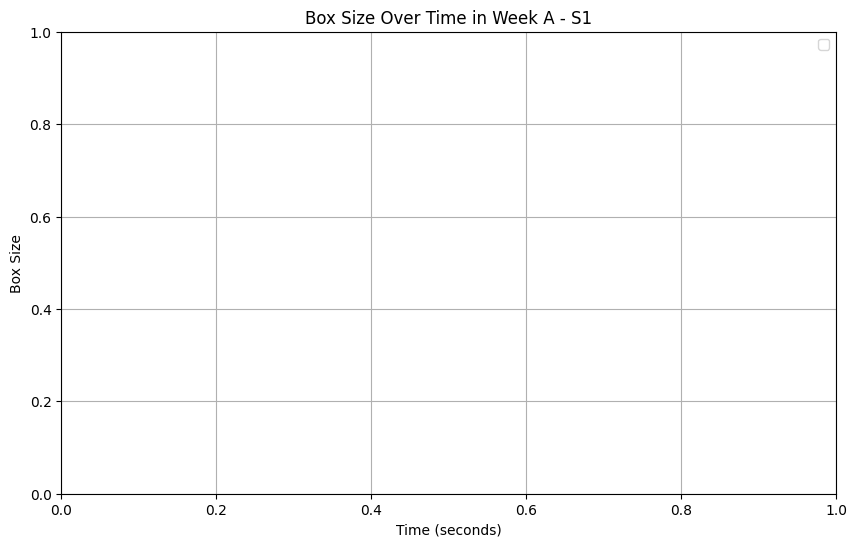

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


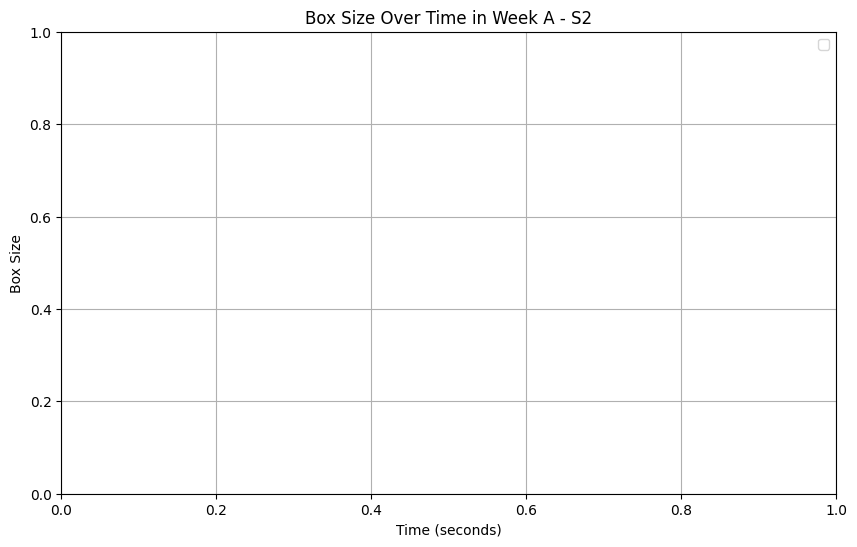

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


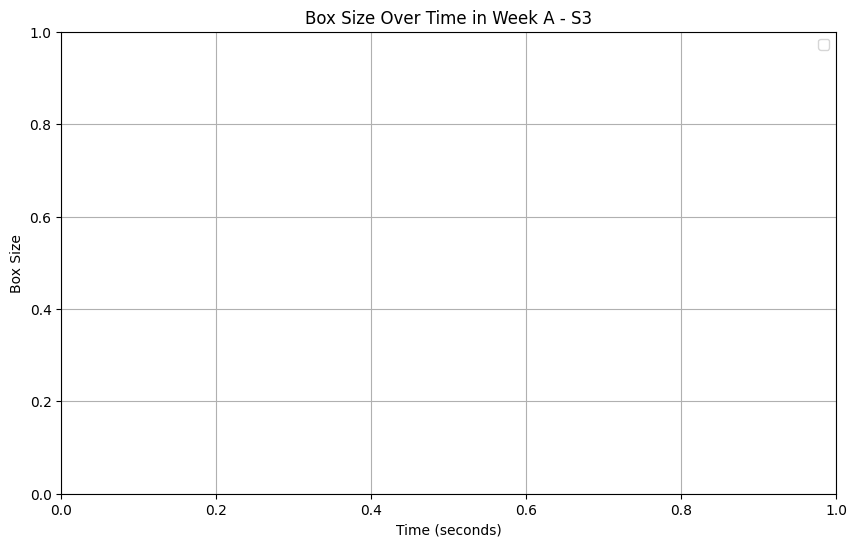

KeyError: 'B1'

In [6]:
path = 'D:\\MultiModal\\filtered_df\\'
save = 'D:\\MultiModal\\save_df\\'
dir_list = ["A"] #  "B", "C", "D", "E", "F", "G"

for week in dir_list:
    current_path = os.path.join(path, week)
    os.chdir(current_path)
    
    files = os.listdir(current_path)
    data_dict = {'A1': {}, 'A2': {}, 'A3': {}, 'A4': {}}
    
    for file in files:
        if file.endswith('.xlsx') or file.endswith('xls'):
            file_path = os.path.join(current_path, file)
            df = pd.read_excel(file_path, index_col=0)
            
            df['box_size'] = df['box.width'] * df['box.height']
            df['time'] = df.index / 25
            
            # 파일 이름에서 사람 및 스텝 정보를 추출
            parts = file.split('_')
            person = parts[2]  # 'A1', 'A2', 'A3', 'A4'
            step = parts[3]  # 'S1', 'S2', 'S3', 등
            
            # 데이터에 스텝 정보 추가
            if step not in data_dict[person]:
                data_dict[person][step] = []
            data_dict[person][step].append(df)
    
    for step in ['S1', 'S2', 'S3']:  # 필요한 스텝 리스트
        plt.figure(figsize=(10, 6))
        
        for person, step_data in data_dict.items():
            if step in step_data:
                combined_df = pd.concat(step_data[step], ignore_index=True)
                combined_df['box_size_smooth'] = combined_df['box_size'].rolling(window=5).mean()
                
                plt.plot(combined_df['time'], combined_df['box_size_smooth'], label=person)
        
        plt.title(f'Box Size Over Time in Week {week} - {step}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Box Size')
        plt.legend()
        plt.grid(True)
        plt.show()